In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Iris Dataset

In [2]:
iris = datasets.load_iris()
X = iris.data 
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=1)

# Visualizing Data

[]

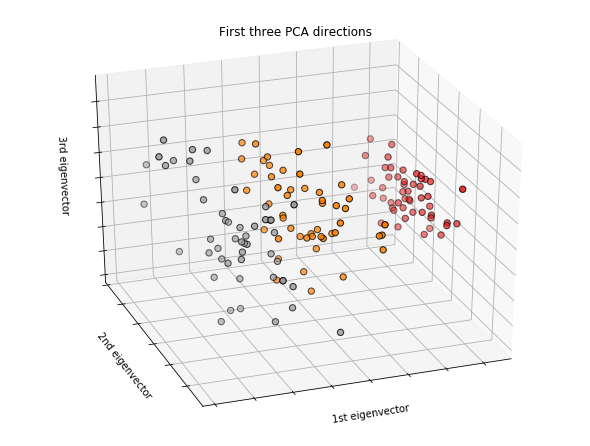

In [3]:
# code from sklearn documentation

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(X)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

# One Hot Encoding Labels

In [4]:
y_train_labels = []

for i in y_train:
    if i == 0:
        y_train_labels.append([1,0,0])
    elif i == 1:
        y_train_labels.append([0,1,0])
    else:
        y_train_labels.append([0,0,1])
        
y_train = np.array(y_train_labels)

In [5]:
y_test_labels = []

for i in y_test:
    if i == 0:
        y_test_labels.append([1,0,0])
    elif i == 1:
        y_test_labels.append([0,1,0])
    else:
        y_test_labels.append([0,0,1])
        
y_test = np.array(y_test_labels)

# Hyper-parameters

In [6]:
LR = 0.01
iterations = 1
np.random.seed(1)


# 3 layer NN
#                                 Matrix Dimensions
# INPUT     l0: 4 perceptrons         (150, 4)
#               w1/b1                 (4,5)
             
# HIDDEN    l1: 5 perceptrons         (150,5)
#               w2/b2                 (5,3) 
             
# OUTPUT    l2: 3 perceptrons         (150, 3)



In [7]:
y_train.shape

(120, 3)

# Network

In [20]:
class Network():
    
    def __init__(self,X_train, X_test, y_train, y_test):
        self.X_train = X_train  # (120, 4)
        self.X_test = X_test    # (30, 4)
        
        self.y_train = y_train_labels  # (120,3)
        self.y_test = y_test_labels    # (30,3)
        self.losses = []
        
        # Initialize weights
        self.w1 = np.random.randn(4,3)  # 4 inputs, 5 nodes in l1  
        self.b1 = np.random.randn(4,5)  # 4 inputs, 5 nodes in l1 
        self.w2 = np.random.randn(5,3)  # 5 nodes in l1, 3 outputs  
        self.b2 = np.random.randn(5,3)  # 5 nodes in l1, 3 outputs   
            
    def sigmoid(self,x):
        return 1/(1-np.exp(-x))
    
    def d_sigmoid(self,x):
        return x*(1-x)
    
    # Full-Batch Training
    def Train(self):
        
        for i in range(iterations):
            l0 = self.X_train                       # Input Layer
            l1 = self.sigmoid(np.dot(l0,self.w1))   # Hidden Layer
            l2 = self.sigmoid(np.dot(l1,self.w2))   # Output Layer
        
            # Back Propagation
            l2_loss = y_train-l2
            self.losses.append(np.square(l2_loss))
            
            # Derivative of loss with respect to w2
            dloss_dw1 = 2*l2_loss*self.d_sigmoid(l2)*l2
            
            # Derivative of loss with respect to b2
#             dloss_db2 = 2*l2_loss*d_sigmoid(l2)*1
            
            # Derivative of loss with respect to w1
#             z=np.dot(l0,self.w1)
            dloss_dw1 = l1*self.d_sigmoid(l1)*self.w2*self.d_sigmoid(l2)*l2
            
            # Derivative of loss with respect to b1
#             dloss_db1 = l1*self.d_sigmoid(l1)*self.w2*self.d_sigmoid(l2)*l2
        
            # Update weights and biases
            self.w1 = self.w1*dloss_dw1*LR
            self.w2 = self.w2*dloss_dw2*LR
            
#             self.b1 = self.b1
#             self.b1 = self.b2
        
            return self.w1,self.w2
    
    # Tests Trained Network with Test Set
    def test_accuracy(self):
        l1 = self.sigmoid(np.dot(self.X_test,self.w1)) 
        l2 = self.sigmoid(np.dot(l1,self.w2))        
        
        correct = 0
        
        for pred,y in enumerate(l2,y_test):
            if pred == y:
                correct +=1
            
        accuracy = correct/len(y_test)
        return accuracy.round(4)
        
    # Returns graph of cost over training
    def loss_graph(self):
        plt.plot(self.loss)

In [21]:
network = Network(X_train, X_test, y_train, y_test)

In [22]:
network.Train()

ValueError: operands could not be broadcast together with shapes (4,3) (120,3) 